In [1]:
print("Hello World")

Hello World


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import pickle

In [6]:
filepath = r"C:\Users\KIRUBAK\Desktop\Gen AI\customer\Data.csv"

In [7]:
data = pd.read_csv(filepath)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [9]:
## Encode the categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

label_encoder_damage = LabelEncoder()
data['Vehicle_Damage'] = label_encoder_damage.fit_transform(data['Vehicle_Damage'])

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,1-2 Year,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,> 2 Years,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,< 1 Year,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,1-2 Year,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,1-2 Year,0,31951.0,152.0,294,0


In [10]:
data.shape

(11504798, 12)

In [11]:
data.dtypes

id                        int64
Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [12]:
data['Vehicle_Age'] = data['Vehicle_Age'].map({
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
})

In [13]:
# Drop all rows with any NaN values
data_cleaned = data.dropna()
data_cleaned.shape

(11504798, 12)

In [14]:
data_cleaned['Response'] = data_cleaned['Response'].astype(int)

In [15]:
data_cleaned.dtypes

id                        int64
Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int32
dtype: object

In [16]:
## Divide the dataset into dependent and independent
x = data_cleaned.drop('Response' ,axis =1)
y = data_cleaned['Response']

In [17]:
y.value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [18]:
## Split the training and testing datasets
X_train, X_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Train the model with XGBoost classifier with scale_pos_we to balance the dataset here we are using the 7.9 based on the response coulmn value counts
model = xgb.XGBClassifier(eval_metric='auc', scale_pos_weight = 7.2)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
### Define the parameter grid to find the best parameter to train the model
param_grid = {
  'max_depth': [3, 5, 7],
  'learning_rate': [0.01, 0.1, 0.2],
  'n_estimators': [100, 200],
  'subsample': [0.8, 1.0]
}

In [21]:
# Set up GridSearchCV
grid_search = GridSearchCV(
estimator=model,
param_grid=param_grid,
scoring='roc_auc',
cv=3,
verbose=1,
n_jobs=-1
)

In [23]:

# Use a subset of the data
subset_size = 100000  # Adjust based on your system's memory
X_subset = X_train[:subset_size]
y_subset = y_train[:subset_size]


In [24]:
grid_search.fit(X_subset, y_subset)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=No...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [25]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best ROC AUC Score: 0.8657767555365953


In [26]:
## Now doing the final training with best parameters

final_model = xgb.XGBClassifier(
learning_rate=0.2,
max_depth=3,
n_estimators=200,
subsample=1.0,
scale_pos_weight=7.9,
use_label_encoder=False,
eval_metric='auc'
)

final_model.fit(X_train, y_train)

c:\Users\KIRUBAK\Desktop\Gen AI\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay

y_pred_proba = final_model.predict_proba(X_test)[:, 1]
y_pred = final_model.predict(X_test)

print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

ROC AUC: 0.8734946785267306
              precision    recall  f1-score   support

           0       0.99      0.68      0.80   2017776
           1       0.29      0.94      0.44    283184

    accuracy                           0.71   2300960
   macro avg       0.64      0.81      0.62   2300960
weighted avg       0.90      0.71      0.76   2300960



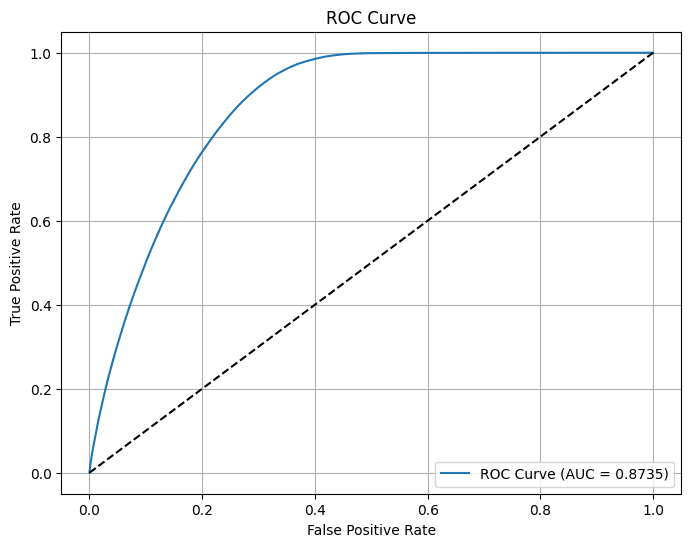

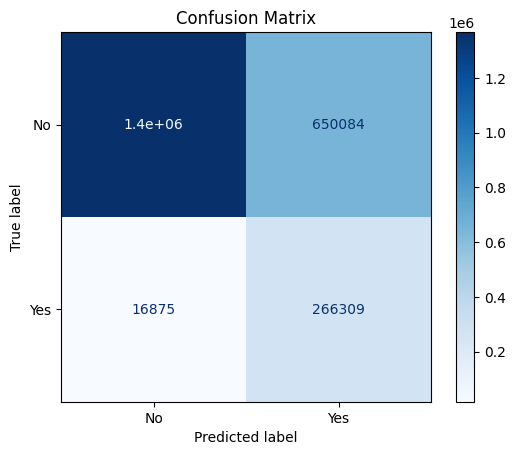

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()